-------------------------
#### Verb Phrase Detection
- A `verb phrase` is a syntactic unit composed of at least one verb. 
- This verb can be followed by other chunks, such as noun phrases. 
- Verb phrases are useful for understanding the actions that nouns are involved in.
-------------------------------

#### Using textacy

In [3]:
#!pip install textacy

In [2]:
import textacy

In [86]:
text = 'The author is writing a new book. I am going to market'

In [87]:
#pattern = r'(<VERB>?<ADV>*<VERB>+)'
#pattern = r'<VERB>?<ADV>*<VERB>+'
#pattern = r'<VERB>*<ADV>*<PART>*<VERB>+<PART>*'

pattern = [{'POS': 'VERB', 'OP': '?'},
           {'POS': 'ADV',  'OP': '*'},
           {'POS': 'VERB', 'OP': '+'}]

In [88]:
text_doc = textacy.make_spacy_doc(text, lang='en_core_web_md')

In [89]:
verb_lists = textacy.extract.matches.token_matches(text_doc, pattern)

In [90]:
list(verb_lists)

[writing, going, market]

In [92]:
# Extract Noun Phrase to explain what nouns are involved
for chunk in text_doc.noun_chunks:
    print (chunk)

The author
a new book
I


#### using spacy

In [3]:
import spacy   
from spacy.matcher import Matcher

In [5]:
nlp = spacy.load('en_core_web_sm')  # download model first

In [5]:
sentence = 'The author was staring pensively as she wrote' 

|OP	|DESCRIPTION |
|---|------------|
|!	|Negate the pattern, by requiring it to match exactly 0 times.|
|?	|Make the pattern `optional`, by allowing it to match 0 or 1 times.
|+	|Require the pattern to match 1 or more times.|
|*	|Allow the pattern to match zero or more times.|

In [28]:
verb_phrase_rules = {
                    "verb_phrases": [
                        {'POS': 'VERB', 'OP': '?'},
                        {'POS': 'ADV',  'OP': '*'},
                        {'OP': '*'},                 # additional wildcard - match any text in between
                        {'POS': 'VERB', 'OP': '+'}
                    ]

}

In [29]:
# instantiate a Matcher instance
matcher = Matcher(nlp.vocab) 

In [30]:
for rule_name, rule_tags in verb_phrase_rules.items(): # register rules in matcher
    matcher.add(rule_name, [rule_tags])

In [31]:
# Process some text
doc = nlp('The author was staring pensively as she wrote')

In [33]:
# Call the matcher on the doc
matches = matcher(doc)

In [34]:
for match_id, start, end in matches:
    print(doc[start:end])

The author was staring
author was staring
was staring
staring
The author was staring pensively as she wrote
author was staring pensively as she wrote
was staring pensively as she wrote
staring pensively as she wrote
pensively as she wrote
as she wrote
she wrote
wrote


In [27]:
spans = [doc[start:end] for _, start, end in matches] 
spans

[The author was staring,
 author was staring,
 was staring,
 staring,
 The author was staring pensively as she wrote,
 author was staring pensively as she wrote,
 was staring pensively as she wrote,
 staring pensively as she wrote,
 pensively as she wrote,
 as she wrote,
 she wrote,
 wrote]

In [35]:
verb_phrase_rules = {
                    "verb_phrases": [
                        {'POS': 'VERB', 'OP': '?'},
                        {'POS': 'ADV',  'OP': '*'},
                        {'POS': 'VERB', 'OP': '+'}
                    ]

}

# instantiate a Matcher instance
matcher = Matcher(nlp.vocab) 

for rule_name, rule_tags in verb_phrase_rules.items(): # register rules in matcher
    matcher.add(rule_name, [rule_tags])

# Process some text
doc = nlp('The author was staring pensively as she wrote')

# Call the matcher on the doc
matches = matcher(doc)

for match_id, start, end in matches:
    print(doc[start:end])

staring
wrote


- find phrases starting with the word `Alice` followed by a `verb`.

In [43]:
location = r'S:\AI-DATASETS\alice.txt'

In [44]:
#reading the data
data = open(location, encoding = 'cp850').read()

In [57]:
phrase_rules = {
                    "phrases": [
                        {"TEXT": "Alice"},
                        {"IS_PUNCT": True, "OP": "*"}
                    ]

}

# instantiate a Matcher instance
matcher = Matcher(nlp.vocab) 

# Add the pattern to the matcher
for rule_name, rule_tags in phrase_rules.items(): # register rules in matcher
    matcher.add(rule_name, [rule_tags])

doc = nlp(data)

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice,', 'Alice', 'Alice', 'Alice,', 'Alice,)', 'Alice', 'Alice', 'Alice', 'Alice;', 'Alice', 'Alice', 'Alice!', 'Alice', 'Alice', 'Alice,', 'Alice', 'Alice,', 'Alice', 'Alice', 'Alice (', 'Alice', 'Alice,', 'Alice', 'Alice!', 'Alice', 'Alice,', 'Alice', 'Alice', 'Alice', 'Alice,', 'Alice', 'Alice,', 'Alice', 'Alice,', 'Alice', 'Alice', 'Alice,', 'Alice', 'Alice,', 'Alice', 'Alice', 'Alice;', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice,', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice;', 'Alice', 'Alice', 'Alice', 'Alice.', 'Alice', 'Alice', 'Alice', 'Alice,', 'Alice', 'Alice,', 'Alice', 'Alice,', 'Alice', 'Alice', 'Alice', 'Alice,', 'Alice', 'Alice.', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice,', 'Alice', 'Alice', 'Alice', 'Alice!', 'Alice'

- Example: Match all words starting with `a` followed by parts of speech that start with `V` (VERB etc)

In [58]:
phrase_rules = {
                    "phrases": [
                        {"TEXT": {"REGEX": "^a"}}, # case-sensitive, text
                        {"POS":  "VERB"}
                    ]

}

# instantiate a Matcher instance
matcher = Matcher(nlp.vocab) 

# Add the pattern to the matcher
for rule_name, rule_tags in phrase_rules.items(): # register rules in matcher
    matcher.add(rule_name, [rule_tags])

doc = nlp(data)

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['are located', 'all seemed', 'and looked', 'and burning', 'about stopping', 'and make', 'and noticed', 'all think', 'and went', 'and saying', 'away went', 'all round', 'all locked', 'all made', 'and found', 'and looked', 'and wander', 'and round', 'and finding', 'and cried', 'and found', 'and said', 'and hurried', 'and began', 'all round', 'and reaching', 'and skurried', 'almost think', 'and say', 'and began', 'and live', 'and have', 'and saying', 'and say', 'and went', 'and found', 'avoid shrinking', 'and seemed', 'and seemed', 'a soothing', 'and washing', 'and beg', 'and making', 'and swam', 'and listen', 'all sat', 'anxiously fixed', 'and offer', 'and left', 'and asking', 'and pulled', 'and handed', 'all crowded', 'all looked', 'and took', 'and had', 'and condemn', 'attending!ÔÇØ said', 'and looking', 'and finish', 'all joined', 'and walked', 'as look', 'all moved', 'again heard', 'and looking', 'and fetch', 'and hurried', 'and get', 'and put', 'and had', 'and growing', 'a

- Here's an example of a more complex pattern using lexical attributes.
- We're looking for five tokens:
    - A token consisting of only digits.
    - Three case-insensitive tokens for "fifa", "world" and "cup".
    - And a token that consists of punctuation.

In [59]:
phrase_rules = {
                    "phrase": [
                         {"IS_DIGIT": True},
                         {"LOWER": "fifa"},
                         {"LOWER": "world"},
                         {"LOWER": "cup"},
                         {"IS_PUNCT": True}
                    ]
}

# instantiate a Matcher instance
matcher = Matcher(nlp.vocab) 

# Add the pattern to the matcher
for rule_name, rule_tags in phrase_rules.items(): # register rules in matcher
    matcher.add(rule_name, [rule_tags])

doc = nlp('2022 FIFA world cup! was won by France')

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['2022 FIFA world cup!']


Use of LEMMA

In this example, we're looking for two tokens:

A verb with the lemma "love", followed by a noun.

This pattern will match "loved dogs" and "love cats".

In [60]:
phrase_rules = {
                    "phrase": [
                         {"LEMMA": "love", "POS": "VERB"},
                         {"POS": "NOUN"}
                    ]

}

# instantiate a Matcher instance
matcher = Matcher(nlp.vocab) 

# Add the pattern to the matcher
for rule_name, rule_tags in verb_phrase_rules.items(): # register rules in matcher
    matcher.add(rule_name, [rule_tags])

doc = nlp('I loved dogs, would love cats the loving cows')

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['loved dogs', 'love cats', 'loving cows']


- Example - 
    - match with LEMMA = 'buy'
    - followed by 0 or 1 DET
    - followed by a NOUN

In [68]:
phrase_rules = {
                    "phrase": [
                         {"LEMMA": "buy", "POS": "VERB"},
                         {"POS": "DET",   "OP": "?"},  # optional: match 0 or 1 times
                         {"POS": "NOUN"}
                    ]

}

# instantiate a Matcher instance
matcher = Matcher(nlp.vocab) 

# Add the pattern to the matcher
for rule_name, rule_tags in phrase_rules.items(): # register rules in matcher
    matcher.add(rule_name, [rule_tags])

doc = nlp("I bought a smartphone. Now I'm buying apps. bought an elephant")

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['bought a smartphone', 'buying apps', 'bought an elephant']


- Write one pattern that only matches mentions of full iOS versions: "iOS 7", "iOS 11" and "iOS 10".

In [6]:
phrase_rules = {
                    "phrase": [
                         {"LOWER": 'ios'}, 
                         {"IS_DIGIT": True}
                    ]
}

# instantiate a Matcher instance
matcher = Matcher(nlp.vocab) 

# Add the pattern to the matcher
for rule_name, rule_tags in phrase_rules.items(): # register rules in matcher
    matcher.add(rule_name, [rule_tags])

doc = nlp("After making the iOS update you won't notice a radical system-wide "
    "redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of "
    "iOS 11's furniture remains the same as in iOS 10. But you will discover "
    "some tweaks once you delve a little deeper ios6.")

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['iOS 7', 'iOS 11', 'iOS 10']


#### Reuseability

- use of `IN` attribute when creating a pattern

In [9]:
phrase_rules = {
                    "phrase": [
                         {'TEXT': {'IN': ['loves', 'love', 'digs', 'devours', 'eat']}}, 
                         {'TEXT': 'pizza'}
                    ]
}

# instantiate a Matcher instance
matcher = Matcher(nlp.vocab) 

# Add the pattern to the matcher
for rule_name, rule_tags in phrase_rules.items(): # register rules in matcher
    matcher.add(rule_name, [rule_tags])

doc = nlp("The world is a great place because pizza. \
           think everyone loves pizza, except people who don\'t \
            I eat pizza")

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['loves pizza', 'eat pizza']


- variations on the word

In [10]:
order_prefixes = ['buy', 'get', 'order', 'orders', 'ordering', 'procure', 'procuring', 'purchase', 
'purchases']

In [13]:
phrase_rules = {
                    "phrase": [
                         {'TEXT': {'IN': order_prefixes}}, 
                         {'TEXT': 'from'}, 
                         {'TEXT': 'Amazon'}
                    ]
}

# instantiate a Matcher instance
matcher = Matcher(nlp.vocab) 

# Add the pattern to the matcher
for rule_name, rule_tags in phrase_rules.items(): # register rules in matcher
    matcher.add(rule_name, [rule_tags])

doc = nlp("I love ordering from Amazon. It\'s like procuring from Amazon is a part of me.")

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['ordering from Amazon', 'procuring from Amazon']


In [27]:
countries = [nlp.make_doc(text) for text in ['Canada', 'United States', 'Mexico']]
days =      [nlp.make_doc(text) for text in ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                             'Friday', 'Saturday', 'Sunday']]

countries = ['Canada', 'United States', 'Mexico']
days      = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                             'Friday', 'Saturday', 'Sunday']

In [28]:
# instantiate a Matcher instance
matcher = Matcher(nlp.vocab) 

phrase_rules = {
                    "countries_list": [
                         {'TEXT': {'IN': countries}}, 
                    ],
                    "days_list": [
                         {'TEXT': {'IN': days}}, 
                    ],

}

# Add the pattern to the matcher
for rule_name, rule_tags in phrase_rules.items(): # register rules in matcher
    matcher.add(rule_name, [rule_tags])

text = 'On Monday I travelled to Canada.'
doc = nlp(text)
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['Monday', 'Canada']


In [31]:
from IPython.display import Image

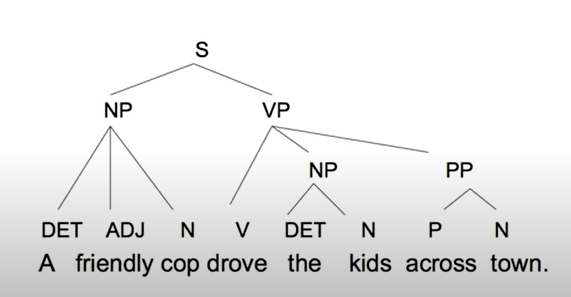

In [36]:
Image(r'S:\AI-icons-images\parsing-phrases-01.png', width=600)

`Phrase structure grammar`

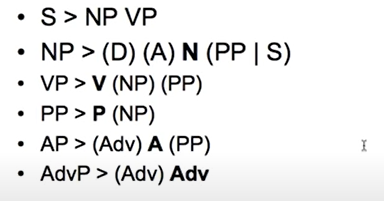

In [35]:
Image(r'S:\AI-icons-images\parsing-phrases-00.png', width=300)

`Extract Noun phrases`

In [39]:
phrase_rules = {
                    "noun_phrase": [
                         {'POS': 'DET'   , 'OP': '?'}, 
                         {'POS': 'ADJ'   , 'OP': '?'}, 
                         {'POS': 'NOUN'}, 
                         {'POS': 'ADP'   , 'OP': '?'}
                    ]
}

# instantiate a Matcher instance
matcher = Matcher(nlp.vocab) 

# Add the pattern to the matcher
for rule_name, rule_tags in phrase_rules.items(): # register rules in matcher
    matcher.add(rule_name, [rule_tags])

doc = nlp("A friendly cop drove the kids across the town")

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['A friendly cop', 'friendly cop', 'cop', 'the kids', 'the kids across', 'kids', 'kids across', 'the town', 'town']
